In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Plotting data

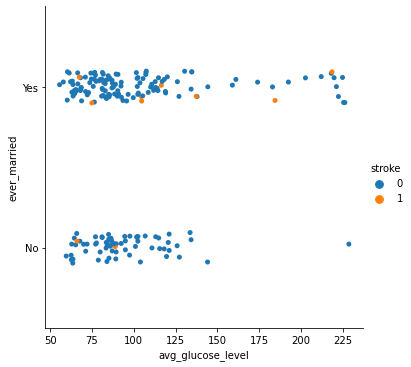

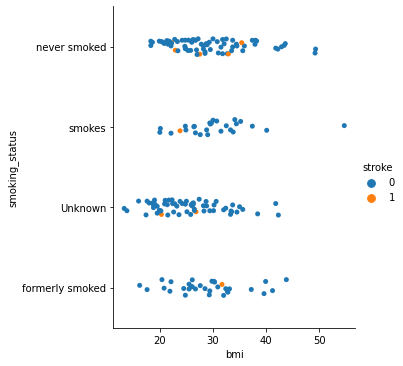

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")
stroke_data_sample = pd.read_csv("healthcare-dataset-stroke-data.csv").sample(200, random_state=44)


X = stroke_data.drop('stroke', axis=1).drop('id', axis=1)
y = stroke_data['stroke']


a = sns.catplot(x="avg_glucose_level", y="ever_married", hue="stroke", data=stroke_data_sample)

a = sns.catplot(x="bmi", y="smoking_status", hue="stroke", data=stroke_data_sample)

# Importing data


In [10]:
#dropNaNs
dataset = pd.read_csv(r"healthcare-dataset-stroke-data.csv")
dataset.dropna(inplace=True)

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

One-hot encoding for work-type/residence/smoking/m-f (This one is currently not used!)


In [11]:
#trying out a different method for one hot encoding so its looks cleaner, not fully tested yet
#ohe = OneHotEncoder(categories='auto')
#feature_arr = ohe.fit_transform(df[['gender','work_type','Residence_type','smoking_status']]).toarray()
#feature_labels = ohe.categories_
#feature_labels = np.array(feature_labels).ravel()

#features = pd.DataFrame(feature_arr, columns=feature_labels)

# One-hot-encoder

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
#gender
ct1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct1.fit_transform(X))
#ever_married
ct2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder='passthrough')
X = np.array(ct2.fit_transform(X))
#work_type
ct3 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [8])], remainder='passthrough')
X = np.array(ct3.fit_transform(X))
#Residence_type
ct4 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [13])], remainder='passthrough')
X = np.array(ct4.fit_transform(X))
#smoking_status
ct5 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [17])], remainder='passthrough')
X = np.array(ct5.fit_transform(X))



# Spliting data: (use the training sets for cross validation etc  (: )

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Scaling features (If needed: For now I used it!)

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# The SVC classifier: Training

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  
              'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
svcgrid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

svcgrid.fit(X_train, y_train)


Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.001, gamma=100, kernel=rbf ..................................
[CV] ...... C=0.001, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.001, gamma=10, kernel=rbf ...................................
[CV] ....... C=0.001, gamma=10, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.001, gamma=10, kernel=rbf ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.933, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.733, total=   0.0s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.933, total=   0.0s
[CV] C=0.001, gamma=0.0001, kernel=rbf ...............................
[CV] ... C=0.001, gamma=0.0001, kernel=rbf, score=0.800, total=   0.0s
[CV] 

[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.467, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.933, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.733, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] .......... C=1, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=1, gamma=100, kernel=rbf ......................................
[CV] .......... C=1, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C

[CV] ........ C=100, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ........ C=100, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ........ C=100, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ........ C=100, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=100, gamma=100, kernel=rbf ....................................
[CV] ........ C=100, gamma=100, kernel=rbf, score=0.467, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.467, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] ......... C=100, gamma=10, kernel=rbf, score=0.467, total=   0.0s
[CV] C=100, gamma=10, kernel=rbf .....................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.933, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.933, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.733, total=   0.0s


[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

Some links that I used

In [ ]:
#https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#https://scikit-learn.org/0.15/modules/cross_validation.html
#https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

# Cross validation for the best estimator of the SVC classifier

In [34]:
from sklearn.model_selection import cross_val_score

#These are the best hyperparameters found during gridsearch
print(svcgrid.best_estimator_) 
#cross validation score for the best estimator currently found.
scores = cross_val_score(svcgrid.best_estimator_, X_train, y_train, cv=5)
scores
scores.mean()


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


0.9333333333333333

Fit the model which we can use for testing

In [35]:
svcgrid.best_estimator_.fit(X_train, y_train)


# All results
means = svcgrid.cv_results_['mean_test_score']
stds = svcgrid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svcgrid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , svcgrid.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

0.467 (+/-0.000) for {'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}
0.640 (+/-0.333) for {'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}
0.480 (+/-0.053) for {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
0.653 (+/-0.371) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}
0.693 (+/-0.410) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.680 (+/-0.371) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.680 (+/-0.371) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.467 (+/-0.000) for {'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}
0.640 (+/-0.333) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.480 (+/-0.053) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.653 (+/-0.371) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.693 (+/-0.410) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.680 (+/-0.371) for {'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}
0.680 (+/-0.371) for {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}
0.467 (+/-0.000) for {'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}
0.640 (+/-0.333) for {'C': 0

# KNN classifier: Training

In [40]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
weights = ['uniform', 'distance']

param_grid_knn = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights=weights)

#param_grid_knn = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29],  
 #             'weights': ['uniform', 'distance']
  #            }  
knngrid = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit = True, verbose = 3) 
knngrid.fit(X_train, y_train)



Fitting 5 folds for each of 5684 candidates, totalling 28420 fits
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=1, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=1, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] leaf_size=1, n_neighbors=2, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=2, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=2, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=2, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=2, p=1, weights=distance ...............
[C

[CV] leaf_size=1, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=5, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=5, p=2, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=5, p=2, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=5, p=2, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=5, p=2, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=5, p=2, weights=uniform ................
[CV

[CV]  leaf_size=1, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=1, n_neighbors=8, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=9, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=9, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=9, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=1, n_neighbors=9, p=1, weights=uniform, score=0.933, tota

[CV]  leaf_size=1, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=12, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=12, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=12, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=1, n_neighbors=12, p=1, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=12, p=1, weights=distance, score=0.867

[CV]  leaf_size=1, n_neighbors=14, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=14, p=2, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=14, p=2, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=14, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=15, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=15, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=15, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=15, p=1, weights=uniform, score=0.93

[CV] leaf_size=1, n_neighbors=18, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=18, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=18, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=18, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=18, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=1, n_neighbors=18, p=1, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=18, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=1, n_neighbors=18, p=1, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=18, p=1, weights=distance ............

[CV]  leaf_size=1, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, n_neighbors=21, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=21, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=1, n_neighbors=21, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=21, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=21, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=1, n_neighbors=21, p=1, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=21, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=1, n_neighbors=21, p=1, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=21, p=1, weights=distance, score=0.933

[CV]  leaf_size=1, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=23, p=2, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=23, p=2, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=23, p=2, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=23, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=24, p=1, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=24, p=1, weights=uniform, score=0.9

[CV]  leaf_size=1, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=26, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=1, n_neighbors=26, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=2, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=26, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=1, n_neighbors=26, p=2, weights=distance ..............
[CV]  leaf_size=1, n_neighbors=26, p=2, weights=distance, score=0.867

[CV]  leaf_size=2, n_neighbors=1, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=2, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=2, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=2, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=1, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=2, n_neighbors=1, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=2, n_neighbors=1, p=1, weights=distance, score=0.800, total

[CV]  leaf_size=2, n_neighbors=4, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=4, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=4, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=4, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=4, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1, weights=distance ...............
[CV]  leaf_size=2, n_neighbors=4, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=4, p=1, weights=distance ...............
[CV]  leaf_size=2, n_neighbors=4, p=1, weights=distance, score=0.800, total

[CV]  leaf_size=2, n_neighbors=7, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=7, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=7, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=7, p=1, weights=uniform ................
[CV]  leaf_size=2, n_neighbors=7, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=7, p=1, weights=distance ...............
[CV]  leaf_size=2, n_neighbors=7, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=7, p=1, weights=distance ...............
[CV]  leaf_size=2, n_neighbors=7, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=7, p=1, weights=distance ...............
[CV]  leaf_size=2, n_neighbors=7, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=7, p=1, weights=distance ...............
[CV]  leaf_size=2, n_neighbors=7, p=1, weights=distance, score=0.867, tot

[CV]  leaf_size=2, n_neighbors=10, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=10, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=10, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=10, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=10, p=1, weights=distance, score=0.733

[CV] leaf_size=2, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=13, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=2, n_neighbors=13, p=2, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=13, p=2, weights=uniform ..........

[CV]  leaf_size=2, n_neighbors=16, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=16, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=16, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=16, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=16, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=16, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=2, n_neighbors=17, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=17, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=17, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=17, p=1, weights=uniform, score=0.

[CV]  leaf_size=2, n_neighbors=19, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=19, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=19, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=20, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=20, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=20, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=20, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=20, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=20, p=1, weights=uniform, score=0.733

[CV]  leaf_size=2, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=22, p=2, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=22, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=2, n_neighbors=22, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=22, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=22, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=22, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=22, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=22, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=22, p=2, weights=distance, score=0.

[CV]  leaf_size=2, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=26, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=2, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=26, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=26, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=2, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=26, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=26, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=26, p=1, weights=distance, score=0.

[CV]  leaf_size=2, n_neighbors=28, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=28, p=2, weights=distance ..............
[CV]  leaf_size=2, n_neighbors=28, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=29, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=2, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=2, n_neighbors=29, p=1, weights=uniform, score=0.600

[CV]  leaf_size=3, n_neighbors=2, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=2, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=3, n_neighbors=2, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=2, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=3, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=3, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=3, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=3, p=1, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=3, p=1, weights=uniform, score=0.867, tota

[CV]  leaf_size=3, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=5, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=3, n_neighbors=5, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=5, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=3, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=6, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=3, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=6, p=1, weights=uniform, score=0.867, tota

[CV]  leaf_size=3, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=3, n_neighbors=8, p=2, weights=uniform ................
[CV]  leaf_size=3, n_neighbors=8, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=3, n_neighbors=8, p=2, weights=distance, score=0.733, to

[CV] leaf_size=3, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=11, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=11, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=11, p=2, weights=distance ...........

[CV]  leaf_size=3, n_neighbors=14, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=14, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=14, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=14, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=14, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=3, n_neighbors=14, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=14, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=14, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=14, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=14, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=14, p=2, weights=distance, score=0.8

[CV]  leaf_size=3, n_neighbors=17, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=17, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=17, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=17, p=2, weights=distance, score=0.867

[CV] leaf_size=3, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=20, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=3, n_neighbors=20, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=20, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=20, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=20, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=3, n_neighbors=20, p=2, weights=uniform ............

[CV]  leaf_size=3, n_neighbors=23, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=23, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=23, p=2, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=23, p=2, weights=uniform, score=0.

[CV]  leaf_size=3, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=26, p=1, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=26, p=1, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=3, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=26, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=3, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=26, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=3, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=26, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=26, p=1, weights=distance, score=0.9

[CV]  leaf_size=3, n_neighbors=28, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=28, p=2, weights=distance ..............
[CV]  leaf_size=3, n_neighbors=28, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=29, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=3, n_neighbors=29, p=1, weights=uniform ...............
[CV]  leaf_size=3, n_neighbors=29, p=1, weights=uniform, score=0.600

[CV]  leaf_size=4, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=2, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=2, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=2, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=2, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=4, n_neighbors=3, p=1, weights=uniform ................
[CV]  leaf_size=4, n_neighbors=3, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=4, n_neighbors=3, p=1, weights=uniform ................
[CV]  leaf_size=4, n_neighbors=3, p=1, weights=uniform, score=0.733, to

[CV]  leaf_size=4, n_neighbors=5, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=5, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=5, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=4, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=4, n_neighbors=6, p=1, weights=uniform, score=0.933, to

[CV]  leaf_size=4, n_neighbors=8, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=4, n_neighbors=8, p=2, weights=uniform ................
[CV]  leaf_size=4, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=8, p=2, weights=uniform ................
[CV]  leaf_size=4, n_neighbors=8, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=4, n_neighbors=8, p=2, weights=distance, score=0.867, tot

[CV]  leaf_size=4, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=11, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=11, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=11, p=2, weights=uniform, score=0.93

[CV] leaf_size=4, n_neighbors=14, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=14, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=14, p=1, weights=distance ..........

[CV] leaf_size=4, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=17, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=4, n_neighbors=17, p=2, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=17, p=2, weights=distance .............

[CV]  leaf_size=4, n_neighbors=20, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=4, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=20, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=4, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=20, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=20, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=20, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=20, p=2, weights=uniform, score=0.

[CV]  leaf_size=4, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.1s
[CV] leaf_size=4, n_neighbors=23, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=23, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=23, p=1, weights=distance, score=1.00

[CV]  leaf_size=4, n_neighbors=25, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=25, p=2, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=25, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=4, n_neighbors=26, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=26, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=26, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=4, n_neighbors=26, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=26, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=26, p=1, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=26, p=1, weights=uniform, score=0.600

[CV]  leaf_size=4, n_neighbors=29, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=29, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=29, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=29, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=29, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=4, n_neighbors=29, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=4, n_neighbors=29, p=2, weights=distance ..............
[CV]  leaf_size=4, n_neighbors=29, p=2, weights=distance, score=1.000

[CV]  leaf_size=5, n_neighbors=3, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=3, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=3, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=3, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=3, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=3, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=5, n_neighbors=3, p=2, weights=uniform ................
[CV]  leaf_size=5, n_neighbors=3, p=2, weights=uniform, score=0.733, to

[CV] leaf_size=5, n_neighbors=5, p=2, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=5, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=5, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=5, n_neighbors=6, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=5, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=5, n_neighbors=6, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=6, p=1, weights=uniform ................
[CV]  leaf_size=5, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=5, n_neighbors=6, p=1, weights=distance ...............
[CV]

[CV] leaf_size=5, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=5, n_neighbors=9, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=9, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=9, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=9, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=9, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=1, weights=distance ...............
[CV]  leaf_size=5, n_neighbors=9, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=9, p=2, weights=uniform ................


[CV]  leaf_size=5, n_neighbors=12, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=12, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=12, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=12, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=12, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=12, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=12, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=12, p=2, weights=distance, score=0.9

[CV]  leaf_size=5, n_neighbors=15, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=15, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=15, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=16, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=16, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=16, p=1, weights=uniform, score=0.800

[CV]  leaf_size=5, n_neighbors=18, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=5, n_neighbors=18, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=18, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=18, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=18, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=18, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=18, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=19, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=19, p=1, weights=uniform, score=0.9

[CV]  leaf_size=5, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=22, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=22, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=22, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=22, p=1, weights=distance, score=0.9

[CV]  leaf_size=5, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=24, p=2, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=24, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=25, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=25, p=1, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=25, p=1, weights=uniform, score=0.93

[CV]  leaf_size=5, n_neighbors=28, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=5, n_neighbors=28, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=28, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=5, n_neighbors=28, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=28, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=28, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=28, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=5, n_neighbors=28, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=28, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=5, n_neighbors=28, p=1, weights=distance ..............
[CV]  leaf_size=5, n_neighbors=28, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=5, n_neighbors=28, p=2, weights=uniform ...............
[CV]  leaf_size=5, n_neighbors=28, p=2, weights=uniform, score=0.

[CV]  leaf_size=6, n_neighbors=2, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=2, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=2, weights=uniform ................
[CV]  leaf_size=6, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=2, p=2, weights=uniform ................
[CV]  leaf_size=6, n_neighbors=2, p=2, weights=uniform, score=0.600, to

[CV]  leaf_size=6, n_neighbors=5, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=5, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=6, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=5, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=5, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=5, p=2, weights=uniform ................
[CV]  leaf_size=6, n_neighbors=5, p=2, weights=uniform, score=0.800, to

[CV] leaf_size=6, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=8, p=2, weights=distance ...............
[CV]  leaf_size=6, n_neighbors=8, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=6, n_neighbors=9, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=6, n_neighbors=9, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=6, n_neighbors=9, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=1, weights=uniform ................
[CV]  leaf_size=6, n_neighbors=9, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=9, p=1, weights=uniform ................
[CV

[CV]  leaf_size=6, n_neighbors=12, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=1, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=12, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=1, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=12, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=12, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=12, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=12, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=12, p=1, weights=distance, score=0.9

[CV]  leaf_size=6, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=15, p=1, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=15, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=15, p=1, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=15, p=1, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=15, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=15, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=15, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=6, n_neighbors=15, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=15, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=15, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=15, p=1, weights=distance, score=0.86

[CV] leaf_size=6, n_neighbors=18, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=18, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=6, n_neighbors=18, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=18, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=18, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=18, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=18, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=18, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=18, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=18, p=2, weights=uniform ..........

[CV]  leaf_size=6, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=21, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=2, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=2, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=21, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=2, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=21, p=2, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=21, p=2, weights=distance, score=0.8

[CV]  leaf_size=6, n_neighbors=24, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=24, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=24, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=24, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=24, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=24, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=24, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=24, p=2, weights=uniform, score=0.80

[CV]  leaf_size=6, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=27, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=1, weights=distance ..............
[CV]  leaf_size=6, n_neighbors=27, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=27, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=6, n_neighbors=27, p=2, weights=uniform ...............
[CV]  leaf_size=6, n_neighbors=27, p=2, weights=uniform, score=0.9

[CV]  leaf_size=7, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=1, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=7, n_neighbors=1, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=7, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=7, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=1, p=1, weights=distance ...............
[CV]  leaf_size=7, n_neighbors=1, p=1, weights=distance, score=0.800, tot

[CV]  leaf_size=7, n_neighbors=3, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=7, n_neighbors=3, p=2, weights=distance ...............
[CV]  leaf_size=7, n_neighbors=3, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=4, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=4, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=4, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=4, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=4, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=4, p=1, weights=uniform, score=0.867, total

[CV]  leaf_size=7, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=7, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=7, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=7, n_neighbors=7, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=7, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=7, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=7, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=7, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=7, p=1, weights=uniform, score=0.933, total=   0.1s
[CV] leaf_size=7, n_neighbors=7, p=1, weights=uniform ................
[CV]  leaf_size=7, n_neighbors=7, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=7, p=1, weights=distance ...............
[CV]  leaf_size=7, n_neighbors=7, p=1, weights=distance, score=1.000, total

[CV]  leaf_size=7, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=10, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=10, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=7, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=10, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=10, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=10, p=1, weights=distance, score=1.000,

[CV]  leaf_size=7, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=13, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=13, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=13, p=1, weights=distance, score=0.9

[CV]  leaf_size=7, n_neighbors=16, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=16, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=16, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=16, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=16, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=16, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=7, n_neighbors=16, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=16, p=1, weights=distance, score=0.867

[CV]  leaf_size=7, n_neighbors=19, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=19, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=19, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=19, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=19, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=19, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=7, n_neighbors=19, p=2, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=19, p=2, weights=uniform, score=1.

[CV]  leaf_size=7, n_neighbors=21, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=7, n_neighbors=22, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=7, n_neighbors=22, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=22, p=1, weights=uniform, score=0.867, total=   0.1s
[CV] leaf_size=7, n_neighbors=22, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=7, n_neighbors=22, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=22, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=22, p=1, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=7, n_neighbors=22, p=1, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=22, p=1, weights=distance, score=1.000

[CV]  leaf_size=7, n_neighbors=24, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=7, n_neighbors=24, p=2, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=24, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=24, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=24, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=24, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=24, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=24, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=24, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=24, p=2, weights=distance, score=0.

[CV] leaf_size=7, n_neighbors=27, p=2, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2, weights=uniform ...............
[CV]  leaf_size=7, n_neighbors=27, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=27, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2, weights=distance ..............
[CV]  leaf_size=7, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=7, n_neighbors=27, p=2, weights=distance ..........

[CV] leaf_size=8, n_neighbors=1, p=2, weights=uniform ................
[CV]  leaf_size=8, n_neighbors=1, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=8, n_neighbors=1, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=8, n_neighbors=1, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=8, n_neighbors=1, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=1, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=1, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=1, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=1, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=1, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=8, n_neighbors=2, p=1, weights=uniform ................


[CV]  leaf_size=8, n_neighbors=4, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=8, n_neighbors=4, p=2, weights=uniform ................
[CV]  leaf_size=8, n_neighbors=4, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=4, p=2, weights=uniform ................
[CV]  leaf_size=8, n_neighbors=4, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=4, p=2, weights=uniform ................
[CV]  leaf_size=8, n_neighbors=4, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=4, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=4, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=4, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=4, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=4, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=4, p=2, weights=distance, score=1.000, tota

[CV]  leaf_size=8, n_neighbors=7, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=7, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=7, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=7, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=7, p=2, weights=distance ...............
[CV]  leaf_size=8, n_neighbors=7, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=8, p=1, weights=uniform ................
[CV]  leaf_size=8, n_neighbors=8, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=8, p=1, weights=uniform ................
[CV]  leaf_size=8, n_neighbors=8, p=1, weights=uniform, score=0.733, to

[CV]  leaf_size=8, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=10, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=10, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=8, n_neighbors=10, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=10, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=10, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=8, n_neighbors=10, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=10, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=10, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=10, p=2, weights=distance, score=0.800

[CV]  leaf_size=8, n_neighbors=13, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=13, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=8, n_neighbors=13, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=13, p=2, weights=distance, score=0.933

[CV]  leaf_size=8, n_neighbors=16, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=16, p=1, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=16, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=16, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=16, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=8, n_neighbors=16, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=16, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=16, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=16, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=16, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=16, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=16, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=16, p=2, weights=uniform, score=0.667

[CV] leaf_size=8, n_neighbors=19, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=19, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=19, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=19, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=19, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=19, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=19, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=19, p=2, weights=distance ..........

[CV]  leaf_size=8, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=22, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=22, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=22, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=23, p=1, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=23, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=8, n_neighbors=23, p=1, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=23, p=1, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=23, p=1, weights=uniform, score=0.9

[CV]  leaf_size=8, n_neighbors=25, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=25, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=25, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=25, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=25, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=25, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=25, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=25, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=25, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=25, p=2, weights=distance, score=0.933

[CV]  leaf_size=8, n_neighbors=28, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=28, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=2, weights=uniform ...............
[CV]  leaf_size=8, n_neighbors=28, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=8, n_neighbors=28, p=2, weights=distance ..............
[CV]  leaf_size=8, n_neighbors=28, p=2, weights=distance, score=1.000

[CV]  leaf_size=9, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=2, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=2, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=2, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=2, p=2, weights=uniform ................
[CV]  leaf_size=9, n_neighbors=2, p=2, weights=uniform, score=0.667, to

[CV]  leaf_size=9, n_neighbors=5, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=1, weights=uniform ................
[CV]  leaf_size=9, n_neighbors=5, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=5, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=5, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=5, p=1, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=5, p=1, weights=distance, score=0.800, to

[CV]  leaf_size=9, n_neighbors=7, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=7, p=2, weights=distance ...............
[CV]  leaf_size=9, n_neighbors=7, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=8, p=1, weights=uniform ................
[CV]  leaf_size=9, n_neighbors=8, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=8, p=1, weights=uniform ................
[CV]  leaf_size=9, n_neighbors=8, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=9, n_neighbors=8, p=1, weights=uniform ................
[CV]  leaf_size=9, n_neighbors=8, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=8, p=1, weights=uniform ................
[CV]  leaf_size=9, n_neighbors=8, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=8, p=1, weights=uniform ................
[CV]  leaf_size=9, n_neighbors=8, p=1, weights=uniform, score=0.800, total

[CV] leaf_size=9, n_neighbors=11, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=11, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=11, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=11, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=11, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=11, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=11, p=2, weights=uniform ............

[CV]  leaf_size=9, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=14, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=14, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=14, p=2, weights=uniform, score=0.

[CV]  leaf_size=9, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=17, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=17, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=17, p=2, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=17, p=2, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=17, p=2, weights=distance, score=0.933

[CV]  leaf_size=9, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=20, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=20, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=9, n_neighbors=20, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=20, p=2, weights=uniform, score=0.80

[CV] leaf_size=9, n_neighbors=23, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=23, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=23, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=23, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=23, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=23, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=23, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=23, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=23, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=23, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=9, n_neighbors=23, p=2, weights=distance .............

[CV] leaf_size=9, n_neighbors=26, p=1, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=26, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=26, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=26, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=26, p=2, weights=distance .............

[CV]  leaf_size=9, n_neighbors=29, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=9, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=29, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=9, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=29, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=29, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=9, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=29, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=9, n_neighbors=29, p=2, weights=uniform ...............
[CV]  leaf_size=9, n_neighbors=29, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=9, n_neighbors=29, p=2, weights=distance ..............
[CV]  leaf_size=9, n_neighbors=29, p=2, weights=distance, score=1.000

[CV]  leaf_size=10, n_neighbors=3, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=3, p=1, weights=distance ..............
[CV]  leaf_size=10, n_neighbors=3, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=10, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=3, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=10, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=3, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=3, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=3, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=10, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=3, p=2, weights=uniform, score=0.800

[CV]  leaf_size=10, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=6, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=6, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=6, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=10, n_neighbors=6, p=2, weights=distance, score=0.867

[CV]  leaf_size=10, n_neighbors=9, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=10, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=10, n_neighbors=9, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=10, n_neighbors=9, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=10, n_neighbors=9, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=10, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=9, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=9, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=10, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=10, n_neighbors=9, p=2, weights=uniform, score=1.0

[CV]  leaf_size=10, n_neighbors=13, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=13, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=10, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=10, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=10, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=10, n_neighbors=13, p=1, weights=distance, sco

[CV] leaf_size=10, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=16, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=16, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=10, n_neighbors=16, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=10, n_neighbors=16, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=16, p=1, weights=distance .....

[CV]  leaf_size=10, n_neighbors=18, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=19, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=10, n_neighbors=19, p=1, weights=distance, scor

[CV]  leaf_size=10, n_neighbors=21, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=10, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=10, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=22, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=10, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=22, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=10, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=10, n_neighbors=22, p=1, weights=distance, scor

[CV] leaf_size=10, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=10, n_neighbors=24, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=10, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=10, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=10, n_neighbors=24, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=25, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=25, p=1, weights=uniform ....

[CV] leaf_size=10, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=28, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=28, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=10, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=28, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=10, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=28, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=10, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=10, n_neighbors=28, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=10, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=10, n_neighbors=28, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=10, n_neighbors=28, p=1, weights=distance ......

[CV]  leaf_size=11, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=11, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=11, n_neighbors=2, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=2, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=2, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=2, p=2, weights=uniform, score=0.66

[CV]  leaf_size=11, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=11, n_neighbors=5, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=11, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=11, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=11, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=5, p=2, weights=uniform, score=0.733

[CV]  leaf_size=11, n_neighbors=8, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=1, weights=distance ..............
[CV]  leaf_size=11, n_neighbors=8, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=1, weights=distance ..............
[CV]  leaf_size=11, n_neighbors=8, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=8, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=8, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=11, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=11, n_neighbors=8, p=2, weights=uniform, score=0.80

[CV]  leaf_size=11, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=11, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=11, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=11, p=2, weights=distance, s

[CV] leaf_size=11, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=14, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=14, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=11, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=15, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=11, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=15, p=1, weights=uniform ....

[CV]  leaf_size=11, n_neighbors=18, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=11, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=18, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=18, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=18, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=18, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=18, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=18, p=2, weights=distance, sc

[CV]  leaf_size=11, n_neighbors=21, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=11, n_neighbors=21, p=1, weights=distance .............
[CV]  leaf_size=11, n_neighbors=21, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=21, p=1, weights=distance .............
[CV]  leaf_size=11, n_neighbors=21, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=21, p=2, weights=uniform, sco

[CV]  leaf_size=11, n_neighbors=24, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=24, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=24, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=25, p=1, weights=uniform, s

[CV] leaf_size=11, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=11, n_neighbors=28, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=29, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=11, n_neighbors=29, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=11, n_neighbors=29, p=1, weights=distance ......

[CV]  leaf_size=12, n_neighbors=4, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2, weights=distance ..............
[CV]  leaf_size=12, n_neighbors=4, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2, weights=distance ..............
[CV]  leaf_size=12, n_neighbors=4, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2, weights=distance ..............
[CV]  leaf_size=12, n_neighbors=4, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=12, n_neighbors=4, p=2, weights=distance ..............
[CV]  leaf_size=12, n_neighbors=4, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=5, p=1, weights=uniform ...............
[CV]  leaf_size=12, n_neighbors=5, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=12, n_neighbors=5, p=1, weights=uniform ...............
[CV]  leaf_size=12, n_neighbors=5, p=1, weights=uniform, score=0.

[CV]  leaf_size=12, n_neighbors=8, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=1, weights=distance ..............
[CV]  leaf_size=12, n_neighbors=8, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=12, n_neighbors=8, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=12, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=12, n_neighbors=8, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=12, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=12, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=12, n_neighbors=8, p=2, weights=uniform, score=0.867

[CV]  leaf_size=12, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=13, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=13, p=1, weights=distance, sc

[CV]  leaf_size=12, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=19, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=19, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=19, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=19, p=1, weights=distance, sco

[CV]  leaf_size=12, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=22, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=22, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=22, p=2, weights=uniform, sco

[CV]  leaf_size=12, n_neighbors=26, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=12, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=12, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=26, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=12, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=26, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=12, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=12, n_neighbors=26, p=1, weights=distance, sco

[CV]  leaf_size=12, n_neighbors=28, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=12, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=12, n_neighbors=28, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=12, n_neighbors=28, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=12, n_neighbors=28, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=29, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=12, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=12, n_neighbors=29, p=1, weights=uniform, sc

[CV]  leaf_size=13, n_neighbors=3, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=13, n_neighbors=3, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=13, n_neighbors=3, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=13, n_neighbors=3, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=13, n_neighbors=3, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1, weights=distance ..............
[CV]  leaf_size=13, n_neighbors=3, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=3, p=1, weights=distance ..............
[CV]  leaf_size=13, n_neighbors=3, p=1, weights=distance, score=0.733

[CV]  leaf_size=13, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=13, n_neighbors=6, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=13, n_neighbors=6, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=13, n_neighbors=6, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=13, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=13, n_neighbors=6, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=13, n_neighbors=6, p=2, weights=distance, score=0.8

[CV]  leaf_size=13, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=11, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=11, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=11, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=11, p=2, weights=uniform, scor

[CV]  leaf_size=13, n_neighbors=14, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=14, p=1, weights=distance, s

[CV]  leaf_size=13, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=17, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=13, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=13, n_neighbors=17, p=2, weights=distance, scor

[CV]  leaf_size=13, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=22, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=22, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=22, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=22, p=1, weights=distance, scor

[CV]  leaf_size=13, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=25, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=13, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=13, n_neighbors=25, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=13, n_neighbors=25, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=13, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=13, n_neighbors=25, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=13, n_neighbors=25, p=2, weights=distance, sc

[CV]  leaf_size=13, n_neighbors=29, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=13, n_neighbors=29, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=13, n_neighbors=29, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=29, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=29, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=29, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=29, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=29, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=13, n_neighbors=29, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=29, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=13, n_neighbors=29, p=1, weights=distance .............
[CV]  leaf_size=13, n_neighbors=29, p=1, weights=distance, s

[CV]  leaf_size=14, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=14, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=14, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=14, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=14, n_neighbors=5, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=14, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=14, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=14, n_neighbors=5, p=2, weights=distance, score=0.867

[CV]  leaf_size=14, n_neighbors=11, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=11, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=11, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=11, p=2, weights=distance, s

[CV]  leaf_size=14, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=14, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=14, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=15, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=14, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=15, p=1, weights=uniform, s

[CV]  leaf_size=14, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=17, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=14, n_neighbors=17, p=2, weights=distance, scor

[CV]  leaf_size=14, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=20, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=14, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=20, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=14, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=20, p=2, weights=uniform, sco

[CV]  leaf_size=14, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=23, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=23, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=23, p=2, weights=uniform, sco

[CV]  leaf_size=14, n_neighbors=27, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=14, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=27, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=14, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=27, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=14, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=14, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=14, n_neighbors=27, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=14, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=14, n_neighbors=27, p=2, weights=uniform, s

[CV]  leaf_size=15, n_neighbors=2, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=15, n_neighbors=2, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=15, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=2, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=15, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=2, p=1, weights=distance, score=0.8

[CV]  leaf_size=15, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=6, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=15, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=15, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=15, n_neighbors=6, p=2, weights=uniform, score=0.

[CV]  leaf_size=15, n_neighbors=10, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=10, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=15, n_neighbors=10, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=15, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=15, n_neighbors=10, p=1, weights=distance, scor

[CV]  leaf_size=15, n_neighbors=13, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=13, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=15, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=13, p=2, weights=distance, scor

[CV] leaf_size=15, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=17, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=18, p=1, weights=uniform .....

[CV]  leaf_size=15, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=23, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=23, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=23, p=2, weights=distance, sc

[CV]  leaf_size=15, n_neighbors=29, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=15, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=29, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=29, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=15, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=29, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=15, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=15, n_neighbors=29, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=15, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=29, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=15, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=15, n_neighbors=29, p=2, weights=distance, scor

[CV]  leaf_size=16, n_neighbors=6, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=16, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=16, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=16, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=16, n_neighbors=7, p=1, weights=uniform ...............
[CV]  leaf_size=16, n_neighbors=7, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=7, p=1, weights=uniform ...............
[CV]  leaf_size=16, n_neighbors=7, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=16, n_neighbors=7, p=1, weights=uniform ...............
[CV]  leaf_size=16, n_neighbors=7, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=7, p=1, weights=uniform ...............
[CV]  leaf_size=16, n_neighbors=7, p=1, weights=uniform, score=0.93

[CV]  leaf_size=16, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=10, p=2, weights=uniform, sco

[CV]  leaf_size=16, n_neighbors=14, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=14, p=1, weights=distance, s

[CV]  leaf_size=16, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=18, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=18, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=18, p=1, weights=distance, sc

[CV]  leaf_size=16, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=21, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=16, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=16, n_neighbors=21, p=2, weights=distance, scor

[CV]  leaf_size=16, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=25, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=16, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=25, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=25, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=25, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=25, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=16, n_neighbors=25, p=1, weights=distance, s

[CV]  leaf_size=16, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=28, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=28, p=2, weights=uniform ..............
[CV]  leaf_size=16, n_neighbors=28, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=16, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=16, n_neighbors=28, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=16, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=16, n_neighbors=28, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=16, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=16, n_neighbors=28, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=16, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=16, n_neighbors=28, p=2, weights=distance, sc

[CV]  leaf_size=17, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=17, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=17, n_neighbors=2, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=17, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=17, n_neighbors=2, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=17, n_neighbors=2, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=17, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=17, n_neighbors=3, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=17, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=17, n_neighbors=3, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=17, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=17, n_neighbors=3, p=1, weights=uniform, score=0.9

[CV]  leaf_size=17, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=17, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=17, n_neighbors=6, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=17, n_neighbors=6, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=17, n_neighbors=6, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=17, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=17, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=17, n_neighbors=6, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=17, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=17, n_neighbors=6, p=2, weights=distance, score=0.8

[CV]  leaf_size=17, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=17, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=17, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=17, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=17, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=17, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=17, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=10, p=2, weights=uniform, sco

[CV]  leaf_size=17, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=13, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=13, p=2, weights=distance, s

[CV]  leaf_size=17, n_neighbors=17, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=17, n_neighbors=17, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=17, n_neighbors=17, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=17, n_neighbors=17, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=17, n_neighbors=17, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=17, n_neighbors=17, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=17, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=17, p=2, weights=uniform, s

[CV] leaf_size=17, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=20, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=21, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=17, n_neighbors=21, p=1, weights=distance ......

[CV]  leaf_size=17, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=17, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=23, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=17, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=24, p=1, weights=uniform, scor

[CV]  leaf_size=17, n_neighbors=27, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=27, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=17, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=17, n_neighbors=27, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=17, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=17, n_neighbors=28, p=1, weights=uniform, s

[CV]  leaf_size=18, n_neighbors=2, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=18, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=18, n_neighbors=2, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=18, n_neighbors=2, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=18, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=18, n_neighbors=2, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=18, n_neighbors=2, p=2, weights=distance, score=0.733

[CV]  leaf_size=18, n_neighbors=6, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=18, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=18, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=18, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=18, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=18, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=18, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=18, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=18, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=18, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=18, n_neighbors=6, p=2, weights=uniform, score=0.

[CV]  leaf_size=18, n_neighbors=10, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=18, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=18, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=18, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=10, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=18, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=10, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=10, p=1, weights=distance, sco

[CV]  leaf_size=18, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=13, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=13, p=2, weights=distance, s

[CV]  leaf_size=18, n_neighbors=17, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=17, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=17, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=17, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=17, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=17, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=18, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=17, p=2, weights=uniform, s

[CV]  leaf_size=18, n_neighbors=20, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=20, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=18, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=20, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=18, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=21, p=1, weights=uniform, sco

[CV] leaf_size=18, n_neighbors=24, p=2, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=24, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=24, p=2, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=24, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=18, n_neighbors=24, p=2, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=24, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=24, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=18, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=18, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=24, p=2, weights=distance ....

[CV]  leaf_size=18, n_neighbors=28, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=28, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=28, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=28, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=28, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=18, n_neighbors=28, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=18, n_neighbors=28, p=2, weights=uniform ..............
[CV]  leaf_size=18, n_neighbors=28, p=2, weights=uniform, s

[CV]  leaf_size=19, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=19, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=19, n_neighbors=2, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=19, n_neighbors=2, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=19, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=19, n_neighbors=2, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=19, n_neighbors=3, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=19, n_neighbors=3, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=19, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=19, n_neighbors=3, p=1, weights=uniform, score=0.9

[CV]  leaf_size=19, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=19, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=19, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=19, n_neighbors=6, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=19, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=19, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=19, n_neighbors=6, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=19, n_neighbors=6, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=19, n_neighbors=6, p=2, weights=distance, score=0.867

[CV]  leaf_size=19, n_neighbors=10, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=19, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=10, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=19, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=19, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=10, p=2, weights=uniform, s

[CV]  leaf_size=19, n_neighbors=14, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=19, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=19, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=19, n_neighbors=14, p=1, weights=distance, s

[CV]  leaf_size=19, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=17, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=18, p=1, weights=uniform, scor

[CV]  leaf_size=19, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=21, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=21, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=21, p=2, weights=distance, sc

[CV]  leaf_size=19, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=19, n_neighbors=27, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=19, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=27, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=19, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=19, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=19, n_neighbors=27, p=2, weights=distance, sc

[CV]  leaf_size=20, n_neighbors=2, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=20, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=20, n_neighbors=2, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=20, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=20, n_neighbors=2, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=2, p=2, weights=distance, score=0.86

[CV]  leaf_size=20, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=20, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=5, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=20, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=20, n_neighbors=6, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=20, n_neighbors=6, p=1, weights=uniform, score=0.9

[CV]  leaf_size=20, n_neighbors=8, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=20, n_neighbors=8, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=9, p=1, weights=uniform ...............
[CV]  leaf_size=20, n_neighbors=9, p=1, weights=uniform, score=1.

[CV] leaf_size=20, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=12, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=12, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=12, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=12, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=12, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=12, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=12, p=2, weights=distance .....

[CV]  leaf_size=20, n_neighbors=16, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=20, n_neighbors=16, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=20, n_neighbors=16, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=20, n_neighbors=16, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=16, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=16, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=16, p=2, weights=uniform, sc

[CV]  leaf_size=20, n_neighbors=20, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=20, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=20, n_neighbors=20, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=20, n_neighbors=20, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=20, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=20, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=20, n_neighbors=20, p=1, weights=distance, s

[CV]  leaf_size=20, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=23, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=24, p=1, weights=uniform, s

[CV]  leaf_size=20, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=20, n_neighbors=27, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=20, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=27, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=20, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=20, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=20, n_neighbors=27, p=2, weights=distance, sc

[CV]  leaf_size=21, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=21, n_neighbors=2, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=21, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=21, n_neighbors=2, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=21, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=21, n_neighbors=2, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=21, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=21, n_neighbors=2, p=2, weights=distance, score=0.733

[CV]  leaf_size=21, n_neighbors=6, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=21, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=21, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=21, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=21, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=21, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=21, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=21, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=21, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=21, n_neighbors=6, p=2, weights=uniform, score=0.

[CV] leaf_size=21, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=10, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=21, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=10, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=21, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=21, n_neighbors=10, p=2, weights=uniform ...

[CV]  leaf_size=21, n_neighbors=14, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=14, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=14, p=1, weights=distance, sco

[CV]  leaf_size=21, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=21, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=21, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=21, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=21, n_neighbors=17, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=18, p=1, weights=uniform, s

[CV]  leaf_size=21, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=21, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=21, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=21, n_neighbors=21, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=21, n_neighbors=21, p=2, weights=distance, sco

[CV] leaf_size=21, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=25, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=25, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=25, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=25, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=25, p=2, weights=uniform .....

[CV]  leaf_size=21, n_neighbors=29, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=29, p=1, weights=distance .............
[CV]  leaf_size=21, n_neighbors=29, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=21, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=29, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=21, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=29, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=29, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=21, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=29, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=21, n_neighbors=29, p=2, weights=uniform ..............
[CV]  leaf_size=21, n_neighbors=29, p=2, weights=uniform, scor

[CV]  leaf_size=22, n_neighbors=4, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=22, n_neighbors=4, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=22, n_neighbors=4, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=4, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=4, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=4, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=22, n_neighbors=4, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=4, p=2, weights=distance, score=0.8

[CV]  leaf_size=22, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=22, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=22, n_neighbors=8, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=22, n_neighbors=8, p=2, weights=distance, score=0.

[CV]  leaf_size=22, n_neighbors=12, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=12, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=12, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=12, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=12, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=12, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=12, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=12, p=2, weights=distance, s

[CV]  leaf_size=22, n_neighbors=16, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=16, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=16, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=16, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=16, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=16, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=16, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=16, p=2, weights=distance, sc

[CV]  leaf_size=22, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=22, n_neighbors=20, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=20, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=20, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=22, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=20, p=2, weights=uniform, scor

[CV]  leaf_size=22, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=24, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=24, p=1, weights=distance .............
[CV]  leaf_size=22, n_neighbors=24, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=22, n_neighbors=24, p=1, weights=distance .............
[CV]  leaf_size=22, n_neighbors=24, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=24, p=1, weights=distance .............
[CV]  leaf_size=22, n_neighbors=24, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=24, p=1, weights=distance .............
[CV]  leaf_size=22, n_neighbors=24, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=24, p=1, weights=distance .............
[CV]  leaf_size=22, n_neighbors=24, p=1, weights=distance, s

[CV]  leaf_size=22, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=27, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=22, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=22, n_neighbors=27, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=22, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=28, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=22, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=22, n_neighbors=28, p=1, weights=uniform, s

[CV]  leaf_size=23, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=23, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=23, n_neighbors=2, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=23, n_neighbors=2, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=23, n_neighbors=2, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=23, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=23, n_neighbors=3, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=23, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=23, n_neighbors=3, p=1, weights=uniform, score=0.

[CV]  leaf_size=23, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=23, n_neighbors=6, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=23, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=23, n_neighbors=6, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=23, n_neighbors=6, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=23, n_neighbors=6, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=23, n_neighbors=6, p=2, weights=distance, score=0.800

[CV]  leaf_size=23, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=23, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=10, p=2, weights=uniform, scor

[CV]  leaf_size=23, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=14, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=14, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=14, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=14, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=14, p=2, weights=uniform, sco

[CV]  leaf_size=23, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=18, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=18, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=18, p=1, weights=distance, sc

[CV]  leaf_size=23, n_neighbors=21, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=22, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=22, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=23, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=22, p=1, weights=distance, scor

[CV]  leaf_size=23, n_neighbors=26, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=23, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=23, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=23, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=23, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=26, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=23, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=26, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=23, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=23, n_neighbors=26, p=1, weights=distance, sco

[CV]  leaf_size=24, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=24, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=24, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=24, n_neighbors=1, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=1, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=1, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=24, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=1, p=2, weights=uniform, score=0.8

[CV]  leaf_size=24, n_neighbors=5, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=24, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=24, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=24, n_neighbors=5, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=24, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=24, n_neighbors=5, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=5, p=2, weights=uniform, score=0.

[CV]  leaf_size=24, n_neighbors=8, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=8, p=1, weights=distance ..............
[CV]  leaf_size=24, n_neighbors=8, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=8, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=8, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=24, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=24, n_neighbors=8, p=2, weights=uniform, score=0.867

[CV]  leaf_size=24, n_neighbors=11, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=11, p=1, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=11, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=11, p=1, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=11, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=24, n_neighbors=11, p=1, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=11, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=11, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=11, p=1, weights=distance, sco

[CV]  leaf_size=24, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=14, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=14, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=14, p=2, weights=uniform, s

[CV]  leaf_size=24, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=18, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=18, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=18, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=18, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=24, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=18, p=2, weights=uniform, sco

[CV]  leaf_size=24, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=24, n_neighbors=22, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=22, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=22, p=2, weights=uniform, sco

[CV]  leaf_size=24, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=24, n_neighbors=26, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=24, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=24, n_neighbors=26, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=24, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=24, n_neighbors=26, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=24, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=24, n_neighbors=26, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=24, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=24, n_neighbors=26, p=2, weights=distance, sc

[CV]  leaf_size=25, n_neighbors=1, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=25, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=1, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=1, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=1, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=25, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=25, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=25, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=1, p=2, weights=distance, score=0.86

[CV] leaf_size=25, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=5, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=25, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=5, p=2, weights=distance ...........

[CV]  leaf_size=25, n_neighbors=9, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=9, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=25, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=9, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=25, n_neighbors=9, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=9, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=25, n_neighbors=9, p=2, weights=distance, score=1.00

[CV] leaf_size=25, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=13, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=13, p=2, weights=uniform ...

[CV]  leaf_size=25, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=17, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=17, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=25, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=17, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=17, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=17, p=1, weights=distance, sc

[CV]  leaf_size=25, n_neighbors=20, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=1, weights=distance .............
[CV]  leaf_size=25, n_neighbors=20, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=20, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=20, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=20, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=25, n_neighbors=20, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=20, p=2, weights=uniform, scor

[CV]  leaf_size=25, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=25, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=25, n_neighbors=23, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=25, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=24, p=1, weights=uniform, sco

[CV]  leaf_size=25, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=27, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=25, n_neighbors=27, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=25, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=25, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=25, n_neighbors=27, p=2, weights=distance, scor

[CV]  leaf_size=26, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=26, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=26, n_neighbors=1, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=1, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=1, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=1, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=1, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=26, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=1, p=2, weights=uniform, score=0.600

[CV]  leaf_size=26, n_neighbors=4, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=1, weights=distance ..............
[CV]  leaf_size=26, n_neighbors=4, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=1, weights=distance ..............
[CV]  leaf_size=26, n_neighbors=4, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=4, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=4, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=4, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=4, p=2, weights=uniform, score=0.80

[CV]  leaf_size=26, n_neighbors=7, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=7, p=1, weights=uniform ...............
[CV]  leaf_size=26, n_neighbors=7, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=7, p=1, weights=distance ..............
[CV]  leaf_size=26, n_neighbors=7, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=7, p=1, weights=distance ..............
[CV]  leaf_size=26, n_neighbors=7, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=7, p=1, weights=distance ..............
[CV]  leaf_size=26, n_neighbors=7, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=7, p=1, weights=distance ..............
[CV]  leaf_size=26, n_neighbors=7, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=7, p=1, weights=distance ..............
[CV]  leaf_size=26, n_neighbors=7, p=1, weights=distance, score=0.

[CV]  leaf_size=26, n_neighbors=11, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=12, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=12, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=12, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=12, p=1, weights=distance, scor

[CV] leaf_size=26, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=15, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=15, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=15, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=15, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=15, p=1, weights=distance ......

[CV]  leaf_size=26, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=21, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=21, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=21, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=21, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=21, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=21, p=1, weights=distance, sc

[CV]  leaf_size=26, n_neighbors=24, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=24, p=2, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=24, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=26, n_neighbors=24, p=2, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=24, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=26, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=26, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=26, n_neighbors=24, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=26, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=26, n_neighbors=24, p=2, weights=distance, sc

[CV]  leaf_size=26, n_neighbors=28, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=26, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=26, n_neighbors=28, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=26, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=28, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=28, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=28, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=26, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=28, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=26, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=26, n_neighbors=28, p=1, weights=distance, s

[CV]  leaf_size=27, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=27, n_neighbors=2, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=2, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=2, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=2, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=27, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=2, p=2, weights=distance, score=0.

[CV] leaf_size=27, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=27, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=27, n_neighbors=6, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=27, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=27, n_neighbors=6, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=6, p=2, weights=uniform .............

[CV]  leaf_size=27, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=27, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=9, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=27, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=9, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=27, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=10, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=10, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=27, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=10, p=1, weights=uniform, score=

[CV]  leaf_size=27, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=13, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=27, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=13, p=2, weights=distance, scor

[CV]  leaf_size=27, n_neighbors=16, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=17, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=17, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=27, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=27, n_neighbors=17, p=1, weights=distance, scor

[CV]  leaf_size=27, n_neighbors=20, p=2, weights=uniform, score=0.533, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=20, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=20, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=20, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=20, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=20, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=27, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=21, p=1, weights=uniform, s

[CV]  leaf_size=27, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=23, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=23, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=23, p=2, weights=distance, sc

[CV] leaf_size=27, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=27, n_neighbors=27, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=27, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=27, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=27, n_neighbors=27, p=2, weights=distance ....

[CV]  leaf_size=28, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=2, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=28, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=28, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=28, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=28, n_neighbors=2, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=28, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=28, n_neighbors=2, p=2, weights=uniform, score=0.8

[CV]  leaf_size=28, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=5, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=28, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=28, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=28, n_neighbors=6, p=1, weights=uniform, score=0.

[CV]  leaf_size=28, n_neighbors=9, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=9, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=9, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=9, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=28, n_neighbors=9, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=28, n_neighbors=9, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=28, n_neighbors=9, p=2, weights=uniform, score=0.

[CV]  leaf_size=28, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=13, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=13, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=13, p=1, weights=distance, scor

[CV]  leaf_size=28, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=16, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=16, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=16, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=16, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=16, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=16, p=1, weights=distance, sc

[CV]  leaf_size=28, n_neighbors=19, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=19, p=2, weights=distance .............
[CV]  leaf_size=28, n_neighbors=19, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=28, n_neighbors=20, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=20, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=20, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=20, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=20, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=20, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=20, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=20, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=20, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=20, p=1, weights=uniform, scor

[CV] leaf_size=28, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=23, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=23, p=1, weights=distance .....

[CV]  leaf_size=28, n_neighbors=26, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=28, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=26, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=26, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=28, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=28, n_neighbors=26, p=1, weights=distance, sco

[CV]  leaf_size=28, n_neighbors=29, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=28, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=28, n_neighbors=29, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=1, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=29, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=1, p=1, weights=uniform, score=0.6

[CV]  leaf_size=29, n_neighbors=4, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=4, p=1, weights=distance ..............
[CV]  leaf_size=29, n_neighbors=4, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=4, p=1, weights=distance ..............
[CV]  leaf_size=29, n_neighbors=4, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=4, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=4, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=29, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=4, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=4, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=4, p=2, weights=uniform, score=0.80

[CV]  leaf_size=29, n_neighbors=7, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=7, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=7, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=7, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=7, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=29, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=29, n_neighbors=7, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=7, p=2, weights=distance ..............
[CV]  leaf_size=29, n_neighbors=7, p=2, weights=distance, score=0.933

[CV] leaf_size=29, n_neighbors=11, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=11, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=11, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=29, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=11, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=11, p=2, weights=uniform ...

[CV] leaf_size=29, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=15, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=15, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=15, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=15, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=15, p=1, weights=distance .....

[CV]  leaf_size=29, n_neighbors=18, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=18, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=18, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=18, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=18, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=29, n_neighbors=18, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=29, n_neighbors=18, p=2, weights=distance, scor

[CV] leaf_size=29, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=21, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=29, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=21, p=2, weights=distance ......

[CV]  leaf_size=29, n_neighbors=25, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=29, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=25, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=29, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=25, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=29, n_neighbors=25, p=1, weights=distance .............
[CV]  leaf_size=29, n_neighbors=25, p=1, weights=distance, scor

[CV]  leaf_size=29, n_neighbors=28, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=29, n_neighbors=28, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=29, n_neighbors=28, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=29, n_neighbors=28, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=29, n_neighbors=28, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=29, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=29, n_neighbors=28, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=29, n_neighbors=29, p=1, weights=uniform ..............
[CV]  leaf_size=29, n_neighbors=29, p=1, weights=uniform, s

[CV]  leaf_size=30, n_neighbors=3, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=30, n_neighbors=3, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=30, n_neighbors=3, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=30, n_neighbors=3, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=30, n_neighbors=3, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=30, n_neighbors=3, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=30, n_neighbors=3, p=2, weights=distance, score=0.867

[CV]  leaf_size=30, n_neighbors=6, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=30, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=30, n_neighbors=6, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=30, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=30, n_neighbors=6, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=30, n_neighbors=6, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=30, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=30, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=30, n_neighbors=6, p=2, weights=distance, score=1.00

[CV] leaf_size=30, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=10, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=10, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=30, n_neighbors=10, p=2, weights=uniform ...

[CV]  leaf_size=30, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=13, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=30, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=13, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=13, p=2, weights=uniform, sc

[CV]  leaf_size=30, n_neighbors=16, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=30, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=17, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=17, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=30, n_neighbors=17, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=17, p=1, weights=distance, scor

[CV]  leaf_size=30, n_neighbors=19, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=2, weights=distance .............
[CV]  leaf_size=30, n_neighbors=19, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=2, weights=distance .............
[CV]  leaf_size=30, n_neighbors=19, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=2, weights=distance .............
[CV]  leaf_size=30, n_neighbors=19, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=2, weights=distance .............
[CV]  leaf_size=30, n_neighbors=19, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=30, n_neighbors=19, p=2, weights=distance .............
[CV]  leaf_size=30, n_neighbors=19, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=30, n_neighbors=20, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=20, p=1, weights=uniform, s

[CV]  leaf_size=30, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=23, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=23, p=1, weights=distance, s

[CV]  leaf_size=30, n_neighbors=27, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=27, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=1, weights=uniform ..............
[CV]  leaf_size=30, n_neighbors=27, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=27, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=27, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=30, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=30, n_neighbors=27, p=1, weights=distance, sc

[CV]  leaf_size=31, n_neighbors=2, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=2, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=2, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=31, n_neighbors=2, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=31, n_neighbors=2, p=1, weights=distance, score=0.800

[CV]  leaf_size=31, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=31, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=31, n_neighbors=5, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=31, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=6, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=31, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=6, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=6, p=1, weights=uniform, score=0.800

[CV]  leaf_size=31, n_neighbors=8, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=31, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=31, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=31, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=31, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=31, n_neighbors=8, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=31, n_neighbors=9, p=1, weights=uniform ...............
[CV]  leaf_size=31, n_neighbors=9, p=1, weights=uniform, score=1.

[CV] leaf_size=31, n_neighbors=12, p=1, weights=distance .............
[CV]  leaf_size=31, n_neighbors=12, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=12, p=1, weights=distance .............
[CV]  leaf_size=31, n_neighbors=12, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=12, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=12, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=31, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=12, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=12, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=12, p=2, weights=uniform ......

[CV]  leaf_size=31, n_neighbors=15, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2, weights=distance .............
[CV]  leaf_size=31, n_neighbors=15, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=15, p=2, weights=distance .............
[CV]  leaf_size=31, n_neighbors=15, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=16, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=16, p=1, weights=uniform, sco

[CV] leaf_size=31, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=31, n_neighbors=18, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=31, n_neighbors=18, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=31, n_neighbors=18, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=31, n_neighbors=18, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=19, p=1, weights=uniform ....

[CV]  leaf_size=31, n_neighbors=22, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=31, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=31, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=31, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=31, n_neighbors=22, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=31, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=22, p=2, weights=uniform, s

[CV]  leaf_size=31, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=31, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=31, n_neighbors=24, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=31, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=25, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=31, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=25, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=31, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=31, n_neighbors=25, p=1, weights=uniform, sco

[CV]  leaf_size=32, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=32, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=32, n_neighbors=1, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=1, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=1, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=1, p=1, weights=distance, score=0.8

[CV]  leaf_size=32, n_neighbors=3, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=3, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=32, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=3, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=4, p=1, weights=uniform ...............
[CV]  leaf_size=32, n_neighbors=4, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=4, p=1, weights=uniform ...............
[CV]  leaf_size=32, n_neighbors=4, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=4, p=1, weights=uniform ...............
[CV]  leaf_size=32, n_neighbors=4, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=4, p=1, weights=uniform ...............
[CV]  leaf_size=32, n_neighbors=4, p=1, weights=uniform, score=0.86

[CV]  leaf_size=32, n_neighbors=6, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=6, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=6, p=2, weights=distance ..............
[CV]  leaf_size=32, n_neighbors=6, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=7, p=1, weights=uniform ...............
[CV]  leaf_size=32, n_neighbors=7, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=7, p=1, weights=uniform ...............
[CV]  leaf_size=32, n_neighbors=7, p=1, weights=uniform, score=0.

[CV]  leaf_size=32, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=10, p=2, weights=uniform, scor

[CV]  leaf_size=32, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=14, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=32, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=14, p=2, weights=uniform, s

[CV]  leaf_size=32, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=19, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=32, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=19, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=19, p=1, weights=distance, scor

[CV]  leaf_size=32, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=22, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=22, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=32, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=22, p=2, weights=uniform, s

[CV]  leaf_size=32, n_neighbors=27, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1, weights=uniform ..............
[CV]  leaf_size=32, n_neighbors=27, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=27, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=27, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=32, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=32, n_neighbors=27, p=1, weights=distance, s

[CV]  leaf_size=33, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=1, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=1, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=33, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=1, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=33, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=33, n_neighbors=2, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=33, n_neighbors=2, p=1, weights=uniform, score=0.

[CV]  leaf_size=33, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=33, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=33, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=33, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=33, n_neighbors=5, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=33, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=5, p=2, weights=distance, score=0.86

[CV]  leaf_size=33, n_neighbors=9, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1, weights=uniform ...............
[CV]  leaf_size=33, n_neighbors=9, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1, weights=uniform ...............
[CV]  leaf_size=33, n_neighbors=9, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1, weights=uniform ...............
[CV]  leaf_size=33, n_neighbors=9, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=9, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=9, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=33, n_neighbors=9, p=1, weights=distance ..............
[CV]  leaf_size=33, n_neighbors=9, p=1, weights=distance, score=0.93

[CV]  leaf_size=33, n_neighbors=12, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=12, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=12, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=12, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=12, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=12, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=12, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=12, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=12, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=33, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=12, p=2, weights=uniform, sc

[CV]  leaf_size=33, n_neighbors=15, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=15, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=15, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=15, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=15, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=2, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=15, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=15, p=2, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=15, p=2, weights=uniform, s

[CV]  leaf_size=33, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=19, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=19, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=19, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=33, n_neighbors=19, p=1, weights=distance, sco

[CV]  leaf_size=33, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=33, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=33, n_neighbors=22, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=33, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=33, n_neighbors=22, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=23, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=33, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=23, p=1, weights=uniform, s

[CV]  leaf_size=33, n_neighbors=26, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=33, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=33, n_neighbors=26, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=33, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=33, n_neighbors=26, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=33, n_neighbors=26, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=33, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=33, n_neighbors=26, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=1, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=27, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=33, n_neighbors=27, p=1, weights=uniform ..............
[CV]  leaf_size=33, n_neighbors=27, p=1, weights=uniform, s

[CV]  leaf_size=34, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=34, n_neighbors=1, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=34, n_neighbors=1, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=34, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=34, n_neighbors=1, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=34, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=34, n_neighbors=2, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=34, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=34, n_neighbors=2, p=1, weights=uniform, score=0.8

[CV]  leaf_size=34, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=34, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=34, n_neighbors=5, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=34, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=34, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=34, n_neighbors=6, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=34, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=34, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=34, n_neighbors=6, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=34, n_neighbors=6, p=1, weights=uniform, score=0.800

[CV] leaf_size=34, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=34, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=10, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=10, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=10, p=1, weights=distance .......

[CV]  leaf_size=34, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=13, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=34, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=14, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=14, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=14, p=1, weights=uniform, sc

[CV]  leaf_size=34, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=17, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=18, p=1, weights=uniform, sc

[CV]  leaf_size=34, n_neighbors=20, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=20, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=20, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=20, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=20, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=34, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=34, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=21, p=1, weights=uniform, sc

[CV]  leaf_size=34, n_neighbors=24, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=24, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=24, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=24, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=24, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=25, p=1, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=25, p=1, weights=uniform, s

[CV]  leaf_size=34, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2, weights=uniform ..............
[CV]  leaf_size=34, n_neighbors=28, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=28, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=28, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=28, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=34, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=34, n_neighbors=28, p=2, weights=distance, sc

[CV]  leaf_size=35, n_neighbors=3, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=35, n_neighbors=3, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=35, n_neighbors=3, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=35, n_neighbors=3, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=35, n_neighbors=3, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=35, n_neighbors=3, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=35, n_neighbors=3, p=2, weights=distance, score=0.93

[CV]  leaf_size=35, n_neighbors=7, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=35, n_neighbors=7, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=35, n_neighbors=7, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=35, n_neighbors=7, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=35, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=35, n_neighbors=7, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=7, p=2, weights=distance ..............
[CV]  leaf_size=35, n_neighbors=7, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=7, p=2, weights=distance ..............
[CV]  leaf_size=35, n_neighbors=7, p=2, weights=distance, score=0.867

[CV]  leaf_size=35, n_neighbors=11, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=35, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=35, n_neighbors=11, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=35, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=35, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=35, n_neighbors=11, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=11, p=1, weights=distance .............
[CV]  leaf_size=35, n_neighbors=11, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=11, p=2, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=11, p=2, weights=uniform, s

[CV]  leaf_size=35, n_neighbors=14, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=14, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=14, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=14, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=14, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=35, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=35, n_neighbors=14, p=2, weights=distance, scor

[CV]  leaf_size=35, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=35, n_neighbors=17, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=18, p=1, weights=uniform, scor

[CV]  leaf_size=35, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=35, n_neighbors=21, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=35, n_neighbors=21, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=35, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=35, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=22, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=35, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=35, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=22, p=1, weights=uniform, sco

[CV]  leaf_size=35, n_neighbors=25, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=35, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=26, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=35, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=35, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=35, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=35, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=35, n_neighbors=26, p=1, weights=distance, scor

[CV]  leaf_size=36, n_neighbors=1, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=36, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=36, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=36, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=36, n_neighbors=1, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=1, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=36, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=1, p=1, weights=distance, score=0.800

[CV]  leaf_size=36, n_neighbors=5, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=5, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=36, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=36, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=5, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=36, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=5, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=36, n_neighbors=5, p=2, weights=uniform, score=0.

[CV]  leaf_size=36, n_neighbors=9, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=36, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=36, n_neighbors=9, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=36, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=36, n_neighbors=9, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=9, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=9, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=36, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=36, n_neighbors=9, p=2, weights=distance, score=0.8

[CV]  leaf_size=36, n_neighbors=14, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=14, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=14, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=36, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=14, p=1, weights=distance, scor

[CV]  leaf_size=36, n_neighbors=18, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=36, n_neighbors=18, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=19, p=1, weights=uniform, scor

[CV]  leaf_size=36, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=23, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=36, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=23, p=1, weights=distance, sc

[CV]  leaf_size=36, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=36, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=26, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=26, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=26, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=36, n_neighbors=26, p=1, weights=distance, sc

[CV]  leaf_size=36, n_neighbors=29, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=36, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=36, n_neighbors=29, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=1, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=1, p=1, weights=uniform, score=0.6

[CV]  leaf_size=37, n_neighbors=5, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=37, n_neighbors=5, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=37, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=37, n_neighbors=5, p=2, weights=distance, score=0.800

[CV]  leaf_size=37, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=37, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=10, p=2, weights=uniform, scor

[CV]  leaf_size=37, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=13, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=13, p=1, weights=distance, s

[CV]  leaf_size=37, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=16, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=16, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=16, p=1, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=16, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=37, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=16, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=37, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=16, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=16, p=1, weights=distance, sco

[CV]  leaf_size=37, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=37, n_neighbors=22, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=22, p=2, weights=uniform, sc

[CV]  leaf_size=37, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=37, n_neighbors=26, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=37, n_neighbors=26, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=37, n_neighbors=26, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=37, n_neighbors=26, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=37, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=37, n_neighbors=26, p=2, weights=distance, sc

[CV] leaf_size=38, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=38, n_neighbors=1, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=38, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=38, n_neighbors=2, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=38, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=38, n_neighbors=2, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=38, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=38, n_neighbors=2, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=38, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=38, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=2, p=1, weights=distance .............

[CV]  leaf_size=38, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=38, n_neighbors=6, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=38, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=38, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=38, n_neighbors=6, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=38, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=38, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=38, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=38, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=38, n_neighbors=6, p=1, weights=distance, score=0.9

[CV]  leaf_size=38, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=38, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=10, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=10, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=10, p=1, weights=distance, s

[CV]  leaf_size=38, n_neighbors=14, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=14, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=14, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=38, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=38, n_neighbors=15, p=1, weights=uniform, s

[CV]  leaf_size=38, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=38, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=38, n_neighbors=19, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=19, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=38, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=19, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=19, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=19, p=1, weights=distance, sc

[CV]  leaf_size=38, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=38, n_neighbors=23, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=38, n_neighbors=23, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=38, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=38, n_neighbors=23, p=1, weights=distance, sc

[CV]  leaf_size=38, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=38, n_neighbors=27, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=27, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=38, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=38, n_neighbors=27, p=2, weights=distance, s

[CV] leaf_size=39, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=39, n_neighbors=2, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=39, n_neighbors=2, p=2, weights=distance ..............
[CV]  leaf_size=39, n_neighbors=2, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=39, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=39, n_neighbors=3, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=39, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=39, n_neighbors=3, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=39, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=39, n_neighbors=3, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=3, p=1, weights=uniform ...............
[CV]  leaf_size=39, n_neighbors=3, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=3, p=1, weights=uniform .............

[CV]  leaf_size=39, n_neighbors=7, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1, weights=distance ..............
[CV]  leaf_size=39, n_neighbors=7, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1, weights=distance ..............
[CV]  leaf_size=39, n_neighbors=7, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=1, weights=distance ..............
[CV]  leaf_size=39, n_neighbors=7, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=39, n_neighbors=7, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=39, n_neighbors=7, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=7, p=2, weights=uniform ...............
[CV]  leaf_size=39, n_neighbors=7, p=2, weights=uniform, score=0.9

[CV]  leaf_size=39, n_neighbors=11, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=11, p=2, weights=distance .............
[CV]  leaf_size=39, n_neighbors=11, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=12, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=12, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=12, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=12, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=12, p=1, weights=uniform, scor

[CV]  leaf_size=39, n_neighbors=16, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=39, n_neighbors=16, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=1, weights=distance .............
[CV]  leaf_size=39, n_neighbors=16, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=16, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=16, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=16, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=16, p=2, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=16, p=2, weights=uniform, sco

[CV]  leaf_size=39, n_neighbors=20, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=39, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=39, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=21, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=39, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=21, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=21, p=1, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=21, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=39, n_neighbors=21, p=1, weights=distance .............
[CV]  leaf_size=39, n_neighbors=21, p=1, weights=distance, scor

[CV]  leaf_size=39, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=25, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=39, n_neighbors=25, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=39, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=39, n_neighbors=25, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=39, n_neighbors=25, p=2, weights=distance, scor

[CV]  leaf_size=39, n_neighbors=29, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=39, n_neighbors=29, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=39, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=39, n_neighbors=29, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=39, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=39, n_neighbors=29, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=40, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=40, n_neighbors=1, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=40, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=40, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=40, n_neighbors=1, p=1, weights=uniform, score

[CV]  leaf_size=40, n_neighbors=5, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=40, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=40, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=40, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=40, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=40, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=40, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=40, n_neighbors=5, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=40, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=40, n_neighbors=5, p=2, weights=distance, score=0.800

[CV]  leaf_size=40, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=40, n_neighbors=9, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=40, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=40, n_neighbors=9, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=40, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=40, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=10, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=10, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=40, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=10, p=1, weights=uniform, score=

[CV]  leaf_size=40, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=40, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=40, n_neighbors=14, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=14, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=40, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=14, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=40, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=14, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=14, p=2, weights=uniform, sco

[CV]  leaf_size=40, n_neighbors=18, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=40, n_neighbors=18, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=18, p=2, weights=distance .............
[CV]  leaf_size=40, n_neighbors=18, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=40, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=19, p=1, weights=uniform, sco

[CV]  leaf_size=40, n_neighbors=23, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=40, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=40, n_neighbors=23, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=23, p=1, weights=distance .............
[CV]  leaf_size=40, n_neighbors=23, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=40, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=23, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=40, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=23, p=2, weights=uniform, sco

[CV]  leaf_size=40, n_neighbors=27, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=40, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=28, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=28, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=40, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=28, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=40, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=28, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=40, n_neighbors=28, p=1, weights=uniform ..............
[CV]  leaf_size=40, n_neighbors=28, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=40, n_neighbors=28, p=1, weights=distance .............
[CV]  leaf_size=40, n_neighbors=28, p=1, weights=distance, scor

[CV]  leaf_size=41, n_neighbors=3, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=41, n_neighbors=3, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=41, n_neighbors=3, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=41, n_neighbors=3, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=2, weights=uniform ...............
[CV]  leaf_size=41, n_neighbors=3, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=41, n_neighbors=3, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=3, p=2, weights=distance ..............
[CV]  leaf_size=41, n_neighbors=3, p=2, weights=distance, score=0.867

[CV]  leaf_size=41, n_neighbors=8, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=8, p=1, weights=uniform ...............
[CV]  leaf_size=41, n_neighbors=8, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=41, n_neighbors=8, p=1, weights=uniform ...............
[CV]  leaf_size=41, n_neighbors=8, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=8, p=1, weights=uniform ...............
[CV]  leaf_size=41, n_neighbors=8, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=41, n_neighbors=8, p=1, weights=uniform ...............
[CV]  leaf_size=41, n_neighbors=8, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=41, n_neighbors=8, p=1, weights=distance ..............
[CV]  leaf_size=41, n_neighbors=8, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=41, n_neighbors=8, p=1, weights=distance ..............
[CV]  leaf_size=41, n_neighbors=8, p=1, weights=distance, score=0.800

[CV]  leaf_size=41, n_neighbors=12, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=41, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=12, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=12, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=41, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=12, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=12, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=41, n_neighbors=12, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=12, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=41, n_neighbors=12, p=2, weights=distance .............
[CV]  leaf_size=41, n_neighbors=12, p=2, weights=distance, scor

[CV]  leaf_size=41, n_neighbors=16, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=16, p=2, weights=distance .............
[CV]  leaf_size=41, n_neighbors=16, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=16, p=2, weights=distance .............
[CV]  leaf_size=41, n_neighbors=16, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=41, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=17, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=41, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=17, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=17, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=17, p=1, weights=uniform, sco

[CV]  leaf_size=41, n_neighbors=21, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=41, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=41, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=21, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=21, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=41, n_neighbors=21, p=2, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=21, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=41, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=41, n_neighbors=21, p=2, weights=distance, scor

[CV]  leaf_size=41, n_neighbors=25, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=41, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=26, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=41, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=26, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=41, n_neighbors=26, p=1, weights=uniform ..............
[CV]  leaf_size=41, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=41, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=41, n_neighbors=26, p=1, weights=distance, scor

[CV]  leaf_size=42, n_neighbors=1, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=1, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=1, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=42, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=1, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=42, n_neighbors=1, p=2, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=1, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=42, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=42, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=42, n_neighbors=1, p=2, weights=distance, score=0.733

[CV]  leaf_size=42, n_neighbors=5, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=6, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=6, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=6, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=42, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=42, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=42, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=42, n_neighbors=6, p=1, weights=distance, score=1.000

[CV]  leaf_size=42, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=42, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=42, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=42, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=42, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=10, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=42, n_neighbors=10, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=42, n_neighbors=10, p=2, weights=distance, scor

[CV]  leaf_size=42, n_neighbors=14, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=42, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=15, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=42, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=15, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=42, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=15, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=42, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=42, n_neighbors=15, p=1, weights=distance, scor

[CV]  leaf_size=42, n_neighbors=19, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=19, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=19, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=19, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=19, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2, weights=distance .............
[CV]  leaf_size=42, n_neighbors=19, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=42, n_neighbors=19, p=2, weights=distance .............
[CV]  leaf_size=42, n_neighbors=19, p=2, weights=distance, scor

[CV]  leaf_size=42, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=24, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=24, p=1, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=24, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=42, n_neighbors=24, p=1, weights=distance .............
[CV]  leaf_size=42, n_neighbors=24, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=42, n_neighbors=24, p=1, weights=distance .............
[CV]  leaf_size=42, n_neighbors=24, p=1, weights=distance, scor

[CV]  leaf_size=42, n_neighbors=28, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=42, n_neighbors=28, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=28, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=28, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=42, n_neighbors=28, p=2, weights=uniform ..............
[CV]  leaf_size=42, n_neighbors=28, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=42, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=42, n_neighbors=28, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=42, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=42, n_neighbors=28, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=42, n_neighbors=28, p=2, weights=distance .............
[CV]  leaf_size=42, n_neighbors=28, p=2, weights=distance, sco

[CV]  leaf_size=43, n_neighbors=4, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=4, p=1, weights=uniform ...............
[CV]  leaf_size=43, n_neighbors=4, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=43, n_neighbors=4, p=1, weights=uniform ...............
[CV]  leaf_size=43, n_neighbors=4, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=43, n_neighbors=4, p=1, weights=distance ..............
[CV]  leaf_size=43, n_neighbors=4, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=43, n_neighbors=4, p=1, weights=distance ..............
[CV]  leaf_size=43, n_neighbors=4, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=43, n_neighbors=4, p=1, weights=distance ..............
[CV]  leaf_size=43, n_neighbors=4, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=4, p=1, weights=distance ..............
[CV]  leaf_size=43, n_neighbors=4, p=1, weights=distance, score=0.8

[CV]  leaf_size=43, n_neighbors=8, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=43, n_neighbors=8, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2, weights=uniform ...............
[CV]  leaf_size=43, n_neighbors=8, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=43, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=43, n_neighbors=8, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=43, n_neighbors=8, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=8, p=2, weights=distance ..............
[CV]  leaf_size=43, n_neighbors=8, p=2, weights=distance, score=0.8

[CV]  leaf_size=43, n_neighbors=13, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=13, p=1, weights=uniform ..............
[CV]  leaf_size=43, n_neighbors=13, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=43, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=43, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=13, p=1, weights=distance, s

[CV]  leaf_size=43, n_neighbors=17, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=43, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=43, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=43, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=17, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=43, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=43, n_neighbors=18, p=1, weights=uniform, s

[CV]  leaf_size=43, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=43, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=22, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=43, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=22, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=43, n_neighbors=22, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=43, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=43, n_neighbors=22, p=2, weights=uniform, s

[CV]  leaf_size=43, n_neighbors=26, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=43, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=26, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=43, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=26, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=26, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=43, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=43, n_neighbors=26, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=1, weights=uniform ..............
[CV]  leaf_size=43, n_neighbors=27, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=43, n_neighbors=27, p=1, weights=uniform ..............
[CV]  leaf_size=43, n_neighbors=27, p=1, weights=uniform, s

[CV]  leaf_size=44, n_neighbors=1, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=1, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=44, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=2, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=44, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=2, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=2, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=44, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=2, p=1, weights=uniform, score=0.667

[CV]  leaf_size=44, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=5, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=44, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=5, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=5, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=5, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=5, p=2, weights=distance, score=0.

[CV]  leaf_size=44, n_neighbors=9, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=9, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=44, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=9, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=44, n_neighbors=9, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=9, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=44, n_neighbors=9, p=2, weights=distance, score=1.00

[CV]  leaf_size=44, n_neighbors=13, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=44, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=44, n_neighbors=13, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=44, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=44, n_neighbors=13, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=13, p=1, weights=distance .............
[CV]  leaf_size=44, n_neighbors=13, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=44, n_neighbors=13, p=2, weights=uniform ..............
[CV]  leaf_size=44, n_neighbors=13, p=2, weights=uniform, s

[CV]  leaf_size=44, n_neighbors=17, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=44, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=17, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=44, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=44, n_neighbors=18, p=1, weights=uniform, s

[CV]  leaf_size=44, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=44, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=44, n_neighbors=22, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=44, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=44, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=44, n_neighbors=22, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=44, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=44, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=44, n_neighbors=22, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=44, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=44, n_neighbors=22, p=1, weights=distance, scor

[CV]  leaf_size=44, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=44, n_neighbors=25, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=25, p=2, weights=uniform ..............
[CV]  leaf_size=44, n_neighbors=25, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=44, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=25, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=25, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=44, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=25, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=44, n_neighbors=25, p=2, weights=distance .............
[CV]  leaf_size=44, n_neighbors=25, p=2, weights=distance, sc

[CV]  leaf_size=45, n_neighbors=1, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=1, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=45, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=45, n_neighbors=1, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=1, p=1, weights=distance ..............
[CV]  leaf_size=45, n_neighbors=1, p=1, weights=distance, score=0.800

[CV] leaf_size=45, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=45, n_neighbors=5, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=5, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=5, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=2, weights=uniform ...............
[CV]  leaf_size=45, n_neighbors=5, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=45, n_neighbors=5, p=2, weights=distance .............

[CV]  leaf_size=45, n_neighbors=9, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=45, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=10, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=10, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=45, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=10, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=10, p=1, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=10, p=1, weights=uniform, score=

[CV]  leaf_size=45, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=14, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=45, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=45, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=45, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=45, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=45, n_neighbors=14, p=1, weights=distance, sc

[CV]  leaf_size=45, n_neighbors=18, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=45, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=45, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=45, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=45, n_neighbors=18, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=18, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=45, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=18, p=2, weights=uniform, s

[CV]  leaf_size=45, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=22, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=22, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=22, p=2, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=22, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=45, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=45, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=45, n_neighbors=22, p=2, weights=distance, scor

[CV]  leaf_size=45, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=45, n_neighbors=26, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=45, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=45, n_neighbors=26, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=45, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=45, n_neighbors=26, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=45, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=45, n_neighbors=26, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=45, n_neighbors=26, p=2, weights=distance .............
[CV]  leaf_size=45, n_neighbors=26, p=2, weights=distance, sc

[CV]  leaf_size=46, n_neighbors=1, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=46, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=46, n_neighbors=1, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=46, n_neighbors=1, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=46, n_neighbors=1, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=46, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=46, n_neighbors=2, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=46, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=46, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=46, n_neighbors=2, p=1, weights=uniform, score=0.8

[CV]  leaf_size=46, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=46, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=46, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=46, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=46, n_neighbors=6, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=46, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=46, n_neighbors=6, p=2, weights=uniform, score=0.66

[CV]  leaf_size=46, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=46, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=10, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=46, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=46, n_neighbors=10, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=46, n_neighbors=10, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=46, n_neighbors=10, p=2, weights=distance, sco

[CV]  leaf_size=46, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=14, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=46, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=14, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=14, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=14, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=14, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=14, p=2, weights=uniform, s

[CV]  leaf_size=46, n_neighbors=18, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=46, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=18, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=18, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=18, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=18, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=46, n_neighbors=18, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=18, p=2, weights=uniform, s

[CV]  leaf_size=46, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=46, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=46, n_neighbors=22, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=46, n_neighbors=22, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=22, p=2, weights=distance .............
[CV]  leaf_size=46, n_neighbors=22, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=46, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=23, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=46, n_neighbors=23, p=1, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=23, p=1, weights=uniform, s

[CV]  leaf_size=46, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=27, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=46, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=27, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=27, p=1, weights=distance .............
[CV]  leaf_size=46, n_neighbors=27, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=46, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=46, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=27, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=46, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=46, n_neighbors=27, p=2, weights=uniform, sc

[CV]  leaf_size=47, n_neighbors=2, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=2, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=2, p=1, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=47, n_neighbors=2, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=47, n_neighbors=2, p=2, weights=uniform ...............
[CV]  leaf_size=47, n_neighbors=2, p=2, weights=uniform, score=0.

[CV]  leaf_size=47, n_neighbors=6, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=47, n_neighbors=6, p=1, weights=uniform ...............
[CV]  leaf_size=47, n_neighbors=6, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=47, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=6, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=47, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=47, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=47, n_neighbors=6, p=1, weights=distance, score=0.

[CV]  leaf_size=47, n_neighbors=10, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=47, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=47, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=10, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=47, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=10, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=10, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=47, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=10, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=10, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=10, p=2, weights=distance, sc

[CV]  leaf_size=47, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=15, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=15, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=15, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=47, n_neighbors=15, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=47, n_neighbors=15, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=15, p=1, weights=distance .............
[CV]  leaf_size=47, n_neighbors=15, p=1, weights=distance, sco

[CV]  leaf_size=47, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=47, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=17, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=47, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=18, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=18, p=1, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=18, p=1, weights=uniform, sco

[CV]  leaf_size=47, n_neighbors=21, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=21, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=21, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=21, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=47, n_neighbors=21, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=21, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=47, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=22, p=1, weights=uniform, s

[CV]  leaf_size=47, n_neighbors=26, p=1, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=47, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=47, n_neighbors=26, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=47, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=47, n_neighbors=26, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=47, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=47, n_neighbors=26, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=47, n_neighbors=26, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=47, n_neighbors=26, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=47, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=47, n_neighbors=26, p=2, weights=uniform, s

[CV]  leaf_size=47, n_neighbors=29, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=47, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=29, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=47, n_neighbors=29, p=2, weights=distance .............
[CV]  leaf_size=47, n_neighbors=29, p=2, weights=distance, score=0.667, total=   0.0s
[CV] leaf_size=48, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=48, n_neighbors=1, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=48, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=48, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=48, n_neighbors=1, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=48, n_neighbors=1, p=1, weights=uniform ...............
[CV]  leaf_size=48, n_neighbors=1, p=1, weights=uniform, score=0

[CV]  leaf_size=48, n_neighbors=5, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=5, p=1, weights=uniform ...............
[CV]  leaf_size=48, n_neighbors=5, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=5, p=1, weights=uniform ...............
[CV]  leaf_size=48, n_neighbors=5, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=48, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=48, n_neighbors=5, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=48, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=48, n_neighbors=5, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=48, n_neighbors=5, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=5, p=1, weights=distance ..............
[CV]  leaf_size=48, n_neighbors=5, p=1, weights=distance, score=0.8

[CV]  leaf_size=48, n_neighbors=9, p=2, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=48, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=48, n_neighbors=9, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=9, p=2, weights=uniform ...............
[CV]  leaf_size=48, n_neighbors=9, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=48, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=48, n_neighbors=9, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=48, n_neighbors=9, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=48, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=48, n_neighbors=9, p=2, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=48, n_neighbors=9, p=2, weights=distance ..............
[CV]  leaf_size=48, n_neighbors=9, p=2, weights=distance, score=0.8

[CV]  leaf_size=48, n_neighbors=13, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=13, p=2, weights=distance .............
[CV]  leaf_size=48, n_neighbors=13, p=2, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=48, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=14, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=14, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=14, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=48, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=14, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=14, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=14, p=1, weights=uniform, scor

[CV]  leaf_size=48, n_neighbors=17, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=17, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=17, p=2, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=17, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=48, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=48, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=48, n_neighbors=17, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=48, n_neighbors=17, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=17, p=2, weights=distance .............
[CV]  leaf_size=48, n_neighbors=17, p=2, weights=distance, sc

[CV]  leaf_size=48, n_neighbors=21, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=22, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=22, p=1, weights=uniform, score=1.000, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=22, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=22, p=1, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=48, n_neighbors=22, p=1, weights=distance .............
[CV]  leaf_size=48, n_neighbors=22, p=1, weights=distance, scor

[CV]  leaf_size=48, n_neighbors=26, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=48, n_neighbors=26, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=26, p=1, weights=distance .............
[CV]  leaf_size=48, n_neighbors=26, p=1, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=48, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=26, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=48, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=26, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=48, n_neighbors=26, p=2, weights=uniform ..............
[CV]  leaf_size=48, n_neighbors=26, p=2, weights=uniform, sco

[CV]  leaf_size=49, n_neighbors=1, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=49, n_neighbors=1, p=2, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=49, n_neighbors=1, p=2, weights=distance ..............
[CV]  leaf_size=49, n_neighbors=1, p=2, weights=distance, score=0.600, total=   0.0s
[CV] leaf_size=49, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=49, n_neighbors=2, p=1, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=49, n_neighbors=2, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=49, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=49, n_neighbors=2, p=1, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=49, n_neighbors=2, p=1, weights=uniform ...............
[CV]  leaf_size=49, n_neighbors=2, p=1, weights=uniform, score=0.73

[CV]  leaf_size=49, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=49, n_neighbors=6, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=6, p=1, weights=distance ..............
[CV]  leaf_size=49, n_neighbors=6, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=49, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=49, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=49, n_neighbors=6, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=49, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=49, n_neighbors=6, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=6, p=2, weights=uniform ...............
[CV]  leaf_size=49, n_neighbors=6, p=2, weights=uniform, score=0.66

[CV]  leaf_size=49, n_neighbors=10, p=1, weights=distance, score=0.733, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=49, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=49, n_neighbors=10, p=1, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=1, weights=distance .............
[CV]  leaf_size=49, n_neighbors=10, p=1, weights=distance, score=0.800, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=10, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=10, p=2, weights=uniform, score=0.800, total=   0.0s
[CV] leaf_size=49, n_neighbors=10, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=10, p=2, weights=uniform, sc

[CV]  leaf_size=49, n_neighbors=14, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=14, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=14, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=14, p=2, weights=uniform, score=0.733, total=   0.0s
[CV] leaf_size=49, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=14, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=14, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=14, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=14, p=2, weights=distance, sc

[CV]  leaf_size=49, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=19, p=1, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=19, p=1, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=19, p=1, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=49, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=49, n_neighbors=19, p=1, weights=distance, score=1.000, total=   0.0s
[CV] leaf_size=49, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=49, n_neighbors=19, p=1, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=19, p=1, weights=distance .............
[CV]  leaf_size=49, n_neighbors=19, p=1, weights=distance, sco

[CV]  leaf_size=49, n_neighbors=23, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=23, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=23, p=2, weights=uniform, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=23, p=2, weights=uniform, score=0.600, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=23, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=23, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=23, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=23, p=2, weights=distance, sco

[CV]  leaf_size=49, n_neighbors=27, p=2, weights=uniform, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=27, p=2, weights=uniform ..............
[CV]  leaf_size=49, n_neighbors=27, p=2, weights=uniform, score=0.667, total=   0.0s
[CV] leaf_size=49, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=27, p=2, weights=distance, score=0.867, total=   0.0s
[CV] leaf_size=49, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=27, p=2, weights=distance, score=0.933, total=   0.0s
[CV] leaf_size=49, n_neighbors=27, p=2, weights=distance .............
[CV]  leaf_size=49, n_neighbors=27, p=2, weights=distance, s

[Parallel(n_jobs=1)]: Done 28420 out of 28420 | elapsed:  2.1min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_j

# Cross validation for the best estimator of the KNN classifier

In [42]:
from sklearn.model_selection import cross_val_score

#These are the best hyperparameters found during gridsearch
print(knngrid.best_estimator_) 
#cross validation score for the best estimator currently found.
scores2 = cross_val_score(knngrid.best_estimator_, X_train, y_train, cv=5)
scores2
scores2.mean()

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=1,
                     weights='uniform')


0.9199999999999999

Fit the model which we can use for testing

In [43]:
svcgrid.best_estimator_.fit(X_train, y_train)

# All results
means = knngrid.cv_results_['mean_test_score']
stds = knngrid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, knngrid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , knngrid.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

0.787 (+/-0.131) for {'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.787 (+/-0.131) for {'leaf_size': 1, 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.747 (+/-0.177) for {'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.747 (+/-0.177) for {'leaf_size': 1, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
0.747 (+/-0.155) for {'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}
0.787 (+/-0.131) for {'leaf_size': 1, 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}
0.707 (+/-0.181) for {'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}
0.747 (+/-0.177) for {'leaf_size': 1, 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}
0.867 (+/-0.189) for {'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.867 (+/-0.189) for {'leaf_size': 1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.813 (+/-0.155) for {'leaf_size': 1, 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}
0.813 (+/-0.155) for {'leaf_size': 1, 'n_neighbor

0.893 (+/-0.160) for {'leaf_size': 13, 'n_neighbors': 13, 'p': 2, 'weights': 'uniform'}
0.893 (+/-0.160) for {'leaf_size': 13, 'n_neighbors': 13, 'p': 2, 'weights': 'distance'}
0.853 (+/-0.100) for {'leaf_size': 13, 'n_neighbors': 14, 'p': 1, 'weights': 'uniform'}
0.907 (+/-0.136) for {'leaf_size': 13, 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}
0.840 (+/-0.136) for {'leaf_size': 13, 'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}
0.853 (+/-0.131) for {'leaf_size': 13, 'n_neighbors': 14, 'p': 2, 'weights': 'distance'}
0.907 (+/-0.136) for {'leaf_size': 13, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
0.907 (+/-0.136) for {'leaf_size': 13, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
0.867 (+/-0.207) for {'leaf_size': 13, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
0.867 (+/-0.207) for {'leaf_size': 13, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
0.880 (+/-0.100) for {'leaf_size': 13, 'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}
0.907 (+/-0.136) for {'leaf

0.867 (+/-0.207) for {'leaf_size': 21, 'n_neighbors': 25, 'p': 2, 'weights': 'distance'}
0.840 (+/-0.261) for {'leaf_size': 21, 'n_neighbors': 26, 'p': 1, 'weights': 'uniform'}
0.867 (+/-0.280) for {'leaf_size': 21, 'n_neighbors': 26, 'p': 1, 'weights': 'distance'}
0.867 (+/-0.207) for {'leaf_size': 21, 'n_neighbors': 26, 'p': 2, 'weights': 'uniform'}
0.880 (+/-0.229) for {'leaf_size': 21, 'n_neighbors': 26, 'p': 2, 'weights': 'distance'}
0.893 (+/-0.299) for {'leaf_size': 21, 'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}
0.893 (+/-0.299) for {'leaf_size': 21, 'n_neighbors': 27, 'p': 1, 'weights': 'distance'}
0.867 (+/-0.207) for {'leaf_size': 21, 'n_neighbors': 27, 'p': 2, 'weights': 'uniform'}
0.867 (+/-0.207) for {'leaf_size': 21, 'n_neighbors': 27, 'p': 2, 'weights': 'distance'}
0.893 (+/-0.181) for {'leaf_size': 21, 'n_neighbors': 28, 'p': 1, 'weights': 'uniform'}
0.907 (+/-0.247) for {'leaf_size': 21, 'n_neighbors': 28, 'p': 1, 'weights': 'distance'}
0.867 (+/-0.207) for {'lea

0.893 (+/-0.160) for {'leaf_size': 33, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.880 (+/-0.155) for {'leaf_size': 33, 'n_neighbors': 8, 'p': 2, 'weights': 'uniform'}
0.867 (+/-0.146) for {'leaf_size': 33, 'n_neighbors': 8, 'p': 2, 'weights': 'distance'}
0.880 (+/-0.196) for {'leaf_size': 33, 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.867 (+/-0.189) for {'leaf_size': 33, 'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.880 (+/-0.155) for {'leaf_size': 33, 'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
0.880 (+/-0.155) for {'leaf_size': 33, 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
0.853 (+/-0.131) for {'leaf_size': 33, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.853 (+/-0.177) for {'leaf_size': 33, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.840 (+/-0.181) for {'leaf_size': 33, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
0.840 (+/-0.200) for {'leaf_size': 33, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}
0.907 (+/-0.136) for {'leaf_size'

0.907 (+/-0.136) for {'leaf_size': 48, 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}
0.840 (+/-0.136) for {'leaf_size': 48, 'n_neighbors': 14, 'p': 2, 'weights': 'uniform'}
0.853 (+/-0.131) for {'leaf_size': 48, 'n_neighbors': 14, 'p': 2, 'weights': 'distance'}
0.907 (+/-0.136) for {'leaf_size': 48, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
0.907 (+/-0.136) for {'leaf_size': 48, 'n_neighbors': 15, 'p': 1, 'weights': 'distance'}
0.867 (+/-0.207) for {'leaf_size': 48, 'n_neighbors': 15, 'p': 2, 'weights': 'uniform'}
0.867 (+/-0.207) for {'leaf_size': 48, 'n_neighbors': 15, 'p': 2, 'weights': 'distance'}
0.880 (+/-0.100) for {'leaf_size': 48, 'n_neighbors': 16, 'p': 1, 'weights': 'uniform'}
0.907 (+/-0.136) for {'leaf_size': 48, 'n_neighbors': 16, 'p': 1, 'weights': 'distance'}
0.827 (+/-0.181) for {'leaf_size': 48, 'n_neighbors': 16, 'p': 2, 'weights': 'uniform'}
0.840 (+/-0.247) for {'leaf_size': 48, 'n_neighbors': 16, 'p': 2, 'weights': 'distance'}
0.920 (+/-0.131) for {'lea

# Simple neural network - training and testing

In [21]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=1)
clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
clf.predict_proba(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)



0.88

## grid search for mlp classifier

In [22]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=100)

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train, y_train)

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    
y_true, y_pred = y_test , clf.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.867 (+/-0.100) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.880 (+/-0.173) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.813 (+/-0.038) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.907 (+/-0.075) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.893 (+/-0.038) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.880 (+/-0.065) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 

c:\users\danil\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## rerun the test and see the increased accuracy


In [19]:
clf.score(X_test, y_test)


0.92

In [ ]:
#links i used:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#https://datascience.stackexchange.com/questions/36049/how-to-adjust-the-hyperparameters-of-mlp-classifier-to-get-more-perfect-performa